In [1]:
from apps import argentina
import pandas as pd
import json
import numpy as np
import re
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:

path = '../Desktop/datosTesis/train/train_'
def load_dict(provincia):
    dicc_usuarios = {}
    print provincia
    with open(path + provincia + '_users_dict.json') as fi:
        dicc_usuarios = json.load(fi)
    return  dicc_usuarios

In [40]:

""" Este script toma los diccionarios hechos por la funcion dictionary de textos.py y
 genera .csv que tienen la cantidad de ocurrencias de las palabras por cada usuario.
"""

for p in argentina:
    dicc_usuarios = load_dict(p)
    df = pd.DataFrame.from_dict(dicc_usuarios,orient='index')
    df = df.drop('user_id', 1)
    df.fillna(0,inplace=True)
    ser = df.sum(axis=0)
#     df = df[df.sum(axis = 1) > 40]
    df = (df / ser)*1000000
    df.to_csv('./dataUsuarios/{0}.csv'.format(p),encoding='utf-8')

jujuy
catamarca
sanjuan
salta
rionegro
lapampa
chaco
mendoza
buenosaires
entrerios
chubut
santacruz
neuquen
misiones
corrientes
formosa
santafe
santiago
cordoba
larioja
tierradelfuego
tucuman
sanluis


In [38]:
# ivalues tiene el csv con las regiones de cada palabra. Estas regiones estan en formato de lista pero como un string
# por lo tanto se parsea
ivalues = 'notebooks/ivalue_entropia_personas_palabras.csv'
df2 = pd.DataFrame.from_csv(ivalues,header=0,encoding='utf-8')

In [40]:
for p in argentina:
    df = pd.read_csv('./dataUsuarios/{0}.csv'.format(p),encoding= 'utf-8',index_col=0)
    df = df[ df.index.isin(df2.index)]
    df.to_csv('./dataUsuarios/filtrado/{0}.csv'.format(p),encoding='utf-8')
    print(p,str(df.shape))

('jujuy', '(66537, 971)')
('catamarca', '(67441, 957)')
('sanjuan', '(68011, 926)')
('salta', '(68917, 884)')
('rionegro', '(69821, 965)')
('lapampa', '(69180, 935)')
('chaco', '(67114, 964)')
('mendoza', '(69754, 945)')
('buenosaires', '(68459, 920)')
('entrerios', '(68860, 969)')
('chubut', '(69023, 954)')
('santacruz', '(68157, 935)')
('neuquen', '(69235, 927)')
('misiones', '(66891, 972)')
('corrientes', '(68960, 939)')
('formosa', '(66595, 903)')
('santafe', '(70324, 937)')
('santiago', '(67000, 887)')
('cordoba', '(70680, 987)')
('larioja', '(67229, 943)')
('tierradelfuego', '(69876, 964)')
('tucuman', '(69581, 962)')
('sanluis', '(66256, 896)')


In [72]:
# listado de todas las provincias de argentina
provincias = ['jujuy',  'catamarca',  'sanjuan',  'salta',  'rionegro',  'lapampa',  'chaco',
               'mendoza',  'buenosaires',  'entrerios',  'chubut',  'santacruz',  'neuquen',
               'misiones',  'corrientes',  'formosa',  'santafe',  'santiago',  'cordoba',  'larioja',  'tierradelfuego',  'tucuman',  'sanluis']


# el path donde se encuentran los .csv con la cantidad de ocurrencias de cada palabra por cada usuario.
# hay un csv por cada provincia, con el nombre [nombreProvincia].csv
path = '/home/dami/tesis/dataUsuarios/filtrado/'


# leo todos los .csv de cada provincia y creo variables con los dataframes de cada provincia con su nombre respectivo.
# ej. la variable buenosaires va a tener el dataframe de buenos aires

freqs = {}
for p in provincias:
    freqs[p] = pd.DataFrame.from_csv(path = path+p+'.csv',encoding='utf-8') # probar con encoding='utf-8'
  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/usr/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/usr/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "/usr/lib/python2.7/inspect.py", line 490, in getmodule
    for modname, module in sys.mo

IndexError: string index out of range

In [76]:

def H(value1,value2):
    x = 0
    if value1 > value2:
        x=1
    elif value1 == value2:
        x=0.5
    return x
 
# Bootstrap test
def bootstraptest (data1,data2,N):
    n = min(len(data1),len(data2))
    p1 = 0
    for i in range(N):
        p1 = p1 + H( data1.sample(n=n,replace=True).mean(),data2.sample(n=n,replace=True).mean() )
    p1 = p1/float(N)
    p2 = (1+2*N*min(p1,1-p1))/float((1+N))
    return p2



In [68]:

def region(palabra):
    return listaProvincias(df2.loc[palabra.decode('utf-8'),'regionTest'])

def sacarCorchetesYComillas(nombre):
    return re.sub("\\[|\\]| |'", "", nombre)

#la region que toma como parametro esta en formato de lista pero es un string, por eso lo parseo
def listaProvincias(region):
    return map(sacarCorchetesYComillas,region.split(','))


def frecuenciaProvincial(palabra,provincia):
    """ Devuelve las frecuencias de la palabra por cada usuario en esa provincia """
    if (palabra.decode('utf-8') not in freqs[provincia].index):
        return pd.Series(np.zeros(len(freqs[provincia].columns)))
    else:
        return freqs[provincia].loc[palabra.decode('utf-8')]

def frecuenciaRegional(palabra,region):
    return pd.Series().append([frecuenciaProvincial(palabra,provincia) for provincia in region])


def restoPais(region):
    """ calcula el conjunto de provincias que no son parte de la region pasada por parametro """
    return [x for x in provincias if x not in region]

#len(frecuenciaRegional('que',['buenosaires','entrerios']))

# calcula la region de la palabra y el resto del pais
# luego obtiene las frecuencias en cada region y realiza el bootrstrap test a partir de esos vectores de frecuencias
def pvalor(palabra,N=100000):
    """calcula el pvalor asociado a que la palabra ocurra mas(o menos) en la region que en el resto del pais"""
    region1 = region(palabra)
    region2 = restoPais(region1)
    freqs1 = (frecuenciaRegional(palabra,region1))
    freqs2 = (frecuenciaRegional(palabra,region2))
    freqs1.fillna(0)
    freqs2.fillna(0)
    return bootstraptest(data1 = freqs1,data2 = freqs2,N=N)

In [15]:
x = ['hoy','de']
# df3 = df2.loc[df2.index .isin(x)]
df3 = df2[1:10000]
df3['pvalor'] = df3.apply(lambda x: pvalor(x.name,1000),axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [90]:
df6 = df2[:30000]
df6['pvalor'] = df6.apply(lambda x: pvalor(x.name,2000),axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [94]:
df6.to_csv('pvaluesPython.csv')

In [69]:
pvalor('abrigos',2000)

KeyError: 'misiones'

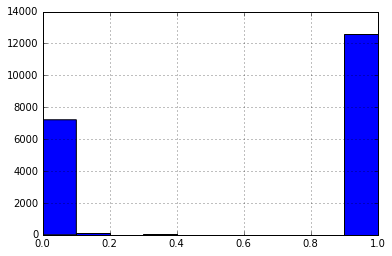

In [93]:
df6.iloc[10000:].pvalor.hist()
plt.show()

In [47]:
df3.loc['abrigos'].pvalor

0.000999000999000999

In [44]:
sum(df3.pvalor < 0.05)

6491

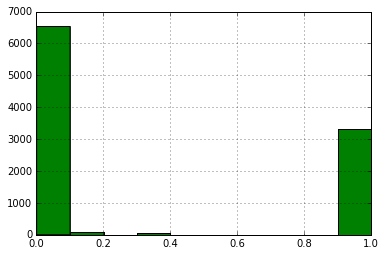

In [49]:
df3.pvalor.hist()
plt.show()

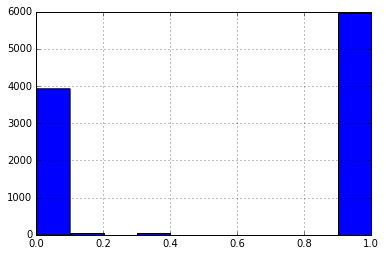

In [89]:
df6.pvalor.hist()
plt.show()

In [79]:
def welch(palabra):
    a = frecuenciaRegional(palabra,region(palabra))
    b = frecuenciaRegional(palabra,restoPais(region(palabra)))
    pvalue = stats.ttest_ind(a, b, equal_var = False)[1]
    #print(palabra,pvalue)
    return pvalue

def wilcoxon(palabra):
    a = frecuenciaRegional(palabra,region(palabra))
    b = frecuenciaRegional(palabra,restoPais(region(palabra)))
    minl = min(len(a),len(b))
    a=a.sample(n=minl,replace=True)
    b=b.sample(n=minl,replace=True)
    pvalue = stats.wilcoxon(a, b)[1]
    print(palabra,pvalue)
    return pvalue

def mannw(palabra):
    a = frecuenciaRegional(palabra,region(palabra))
    b = frecuenciaRegional(palabra,restoPais(region(palabra)))
    minl = min(len(a),len(b))
    a=a.sample(n=minl,replace=True)
    b=b.sample(n=minl,replace=True)
    pvalue = stats.mannwhitneyu(a, b)[1]
    #print(palabra,pvalue)
    return pvalue

In [56]:
welch('que')
welch('de')
welch('aijue')
welch('mitai')
welch('culia')


1.9388381127417534e-16

In [57]:
df = df2.apply(lambda x: welch(x.name),axis=1)

In [85]:
df4.iloc[1:10000][df4.iloc[1:10000]['pvalor']<0.01].shape

(4971, 95)

In [87]:
df3.iloc[:10000][df3.iloc[:10000]['pvalor']<0.01].shape

(6367, 95)

In [58]:
df = pd.DataFrame(df)
df.columns = ['pvalor']
df4 = pd.merge(df2,df,left_index=True, right_index=True)

In [96]:
df4.to_csv('welch.csv')

In [95]:
region('angá')

['corrientes', 'formosa', 'chaco']

In [94]:
freqs['formosa'].iloc[500:600]

,498879661,145701157,72332890,2464801454,1332942920,2724793185,1646275213,163288531,2656729745,939536802,...,443969347,1255741922,2490511194,376558815,2163130260,736259522,1375744500,1949732755,823863463,289594166
ando,0.000000,0.000000,0.000000,221.557550,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
andrea,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
andres,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
android,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,228.675966,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
andrés,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,184.791647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
andy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
andá,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anga,236.211173,261.301280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,184.791647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
angel,0.000000,65.325320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,184.791647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
angeles,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


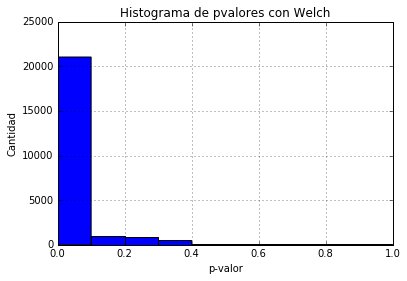

In [70]:
ax = df4.iloc[1:80000].pvalor.hist()
ax.set_xlabel('p-valor')
ax.set_ylabel('Cantidad')
ax.set_title('Histograma de pvalores con Welch')

plt.show()

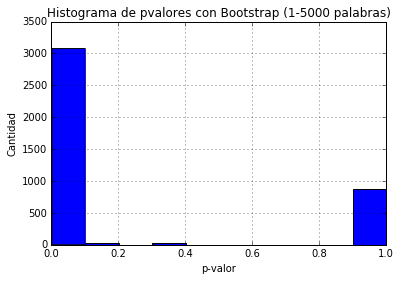

In [79]:
ax = df3.iloc[1000:5000].pvalor.hist()
ax.set_xlabel('p-valor')
ax.set_ylabel('Cantidad')
ax.set_title('Histograma de pvalores con Bootstrap (1-5000 palabras)')

plt.show()

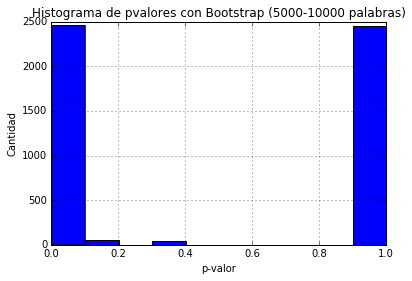

In [78]:
ax = df3.iloc[5000:10000].pvalor.hist()
ax.set_xlabel('p-valor')
ax.set_ylabel('Cantidad')
ax.set_title('Histograma de pvalores con Bootstrap (5000-10000 palabras)')

plt.show()

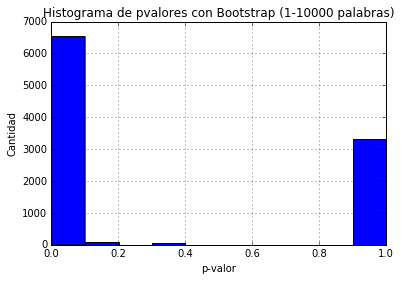

In [80]:
ax = df3.iloc[1:10000].pvalor.hist()
ax.set_xlabel('p-valor')
ax.set_ylabel('Cantidad')
ax.set_title('Histograma de pvalores con Bootstrap (1-10000 palabras)')

plt.show()

In [3]:
df = pd.read_csv('welch.csv')

In [4]:
df[['palabra','pvalor']]

,palabra,pvalor
0,chivilcoy,4.648670e-19
1,oberá,9.160690e-14
2,ushuaia,2.310493e-30
3,ush,2.244768e-15
4,obera,2.287540e-15
5,breñas,2.762564e-05
6,viedma,5.994942e-29
7,bragado,1.597573e-08
8,logroño,7.376012e-15
9,nqn,2.209994e-43


In [5]:
df2 = pd.read_csv('pvaluesPython.csv')
df2[['palabra','pvalor']]

,palabra,pvalor
0,chivilcoy,0.000500
1,oberá,0.000500
2,ushuaia,0.000500
3,ush,0.000500
4,obera,0.000500
5,breñas,0.000500
6,viedma,0.000500
7,bragado,0.000500
8,logroño,0.000500
9,nqn,0.000500


In [6]:
dfp = pd.DataFrame({'palabra':df2.palabra,'pvalorBootstrap':df2.pvalor,'pvalorWelch':df.iloc[:30000].pvalor})

In [7]:
ambos_rechazan = dfp[(dfp.pvalorBootstrap < 0.05) & (dfp.pvalorWelch < 0.05)]
b_rechaza = dfp[(dfp.pvalorBootstrap < 0.05) & (dfp.pvalorWelch > 0.05)]
w_rechaza = dfp[(dfp.pvalorBootstrap > 0.05) & (dfp.pvalorWelch < 0.05)]

In [8]:
def tasa_rechazo(pvalores,cota):
    return len(pvalores[pvalores<cota])/float(len(pvalores))

In [66]:
tests = ['bootstrap','welch']
pvalores = {}
for t in tests:
    pvalores[t] = {}

for test in tests:
    for i in range(1000,30001,1000):
        if test == 'bootstrap':
            pvalor = tasa_rechazo(dfp.pvalorBootstrap.iloc[:i],0.01)
#             print("tasa de rechazo {0} {1} : ".format(test,i) + str(pvalor))
        else:
            pvalor = tasa_rechazo(dfp.pvalorWelch.iloc[:i],0.01)
#             print("tasa de rechazo {0} {1} : ".format(test,i) + str(pvalor))
        pvalores[test][i] = pvalor

In [24]:
pvalores_df = pd.DataFrame.from_dict(pvalores,orient='columns')
pvalores_df

,bootstrap,welch
1000,0.999000,0.873000
2000,0.978000,0.820000
3000,0.925000,0.749667
4000,0.857750,0.686500
5000,0.804400,0.635800
6000,0.761667,0.596167
7000,0.724714,0.563714
8000,0.691375,0.538625
9000,0.664889,0.518222
10000,0.637500,0.497200


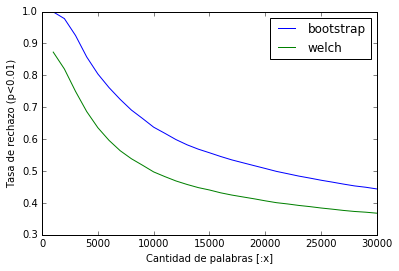

In [68]:
ax = pvalores_df.plot(xlim=[0,30001])
ax.set_xlabel('Cantidad de palabras [:x]')
ax.set_ylabel('Tasa de rechazo (p<0.01)')

In [70]:
dfp[pd.isnull(dfp.pvalorWelch)][['palabra','pvalorBootstrap']]

,palabra,pvalorBootstrap
1239,enchota,1.0
1293,churo,1.0
1367,eña,1.0
1477,machada,1.0
1478,caú,1.0
1536,angá,1.0
1612,trole,1.0
1648,maicenitas,1.0
1696,aum,1.0
1740,empingante,1.0


In [63]:
df[pd.isnull(df.pvalor)]

,palabra,buenosairesPalabras,catamarcaPalabras,chacoPalabras,chubutPalabras,cordobaPalabras,corrientesPalabras,entreriosPalabras,formosaPalabras,jujuyPalabras,...,information_value_palabras,information_value_personas,information_value_personas_palabras,rankPalabras,rankPersonas,rankPalabras_Personas,regionTest,cantPalabrasTotalesEnRegion,cantPalabrasWEnRegion,pvalor
1239,enchota,0,27,0,0,0,0,0,0,19,...,10.172613,9.945577,0.061942,2747,1357,1240,"['tucuman', 'salta', 'catamarca', 'jujuy']",30858265,113,NaN
1293,churo,0,0,0,40,0,0,10,0,3,...,10.307640,10.827953,0.058799,2700,1196,1294,"['chubut', 'salta', 'sanjuan']",24769189,94,NaN
1367,eña,0,5,0,1,0,1,0,0,0,...,10.744317,9.479502,0.054680,2529,1456,1368,"['tucuman', 'sanjuan', 'salta']",25122970,101,NaN
1477,machada,0,38,10,0,0,0,0,0,7,...,8.384813,8.033800,0.048868,3615,1846,1478,"['catamarca', 'santiago', 'tucuman', 'salta']",32262216,118,NaN
1478,caú,0,0,0,0,0,26,0,18,0,...,11.585038,11.936389,0.048851,2264,1016,1479,"['misiones', 'corrientes', 'formosa']",23401519,76,NaN
1536,angá,0,0,14,0,0,36,0,34,0,...,11.596618,9.874269,0.046526,2260,1368,1537,"['corrientes', 'formosa', 'chaco']",23217313,84,NaN
1612,trole,0,0,0,0,35,0,0,1,1,...,11.439026,10.195284,0.042423,2318,1316,1613,"['mendoza', 'cordoba']",19478331,70,NaN
1648,maicenitas,0,26,0,0,0,0,0,0,14,...,9.161928,8.826032,0.041042,3203,1616,1649,"['catamarca', 'salta', 'sanjuan', 'larioja']",30803030,81,NaN
1696,aum,0,1,0,0,0,2,0,1,0,...,11.317067,11.356013,0.039668,2357,1115,1697,"['mendoza', 'salta']",16909051,74,NaN
1740,empingante,0,8,0,0,0,1,0,0,4,...,9.851161,9.360741,0.038124,2868,1486,1741,"['tucuman', 'salta', 'santiago']",24100907,71,NaN
